In [1]:
import sys
import torch
import matplotlib.pyplot as plt
from captum.attr import Saliency, GuidedGradCam, DeepLift

sys.path.append("..")
from lib import models, utils

In [2]:
device = utils.select_device()

CUDA device selected.


In [4]:
generator = models.Generator28(noise_dim=100, channels=1, feature_maps=64).to(device)
discriminator = models.Discriminator28(channels=1, feature_maps=64).to(device)

generator.load_state_dict(torch.load('../weights/xdcgan/mnist/gen_epoch_9.pth', map_location=torch.device(device)))
discriminator.load_state_dict(torch.load('../weights/xdcgan/mnist/disc_epoch_9.pth', map_location=torch.device(device)))

<All keys matched successfully>

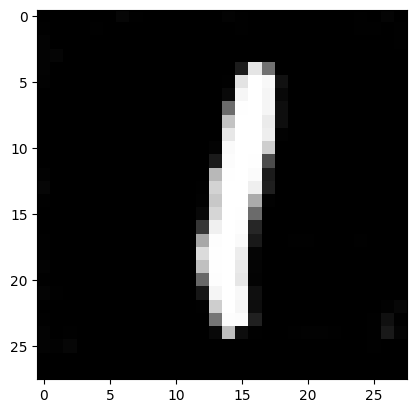

In [5]:
noise = torch.randn(1, 100, 1, 1, device=device)
fake = generator(noise)

plt.imshow(fake.cpu().detach().squeeze().numpy(), cmap=plt.cm.gray)

# Saliency

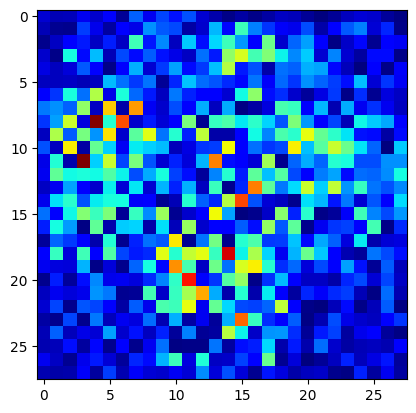

In [7]:
saliency = Saliency(discriminator)
s_exp = saliency.attribute(fake)

plt.imshow(s_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)

# DeepLift

c:\Users\guilherme.botazzo\.conda\envs\pytorch\lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


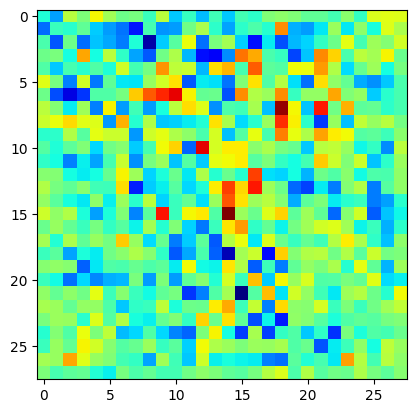

In [13]:
dl = DeepLift(discriminator)
dl_exp = dl.attribute(fake)

plt.imshow(dl_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)

# Guided Grad-CAM

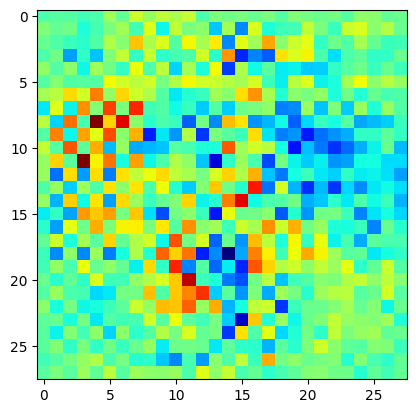

In [12]:
ggc = GuidedGradCam(discriminator, discriminator.network[9])
ggc_exp = ggc.attribute(fake)

plt.imshow(ggc_exp.cpu().detach().squeeze().numpy(), cmap=plt.cm.jet)